In [3]:
import numpy as np
import pandas as pd

* 학생 50명의 학번, 영어, 수학 성적을 저장하고 있는 scores_50.csv 파일을 읽어들여 데이터프레임 scores를 생성합니다.
* 이때 데이터프레임 scores의 인덱스로 학번을 지정합니다.

In [4]:
scores = pd.read_csv("scores_50.csv", index_col="학번")
scores.head()

,영어,수학
학번,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   영어      50 non-null     int64
 1   수학      50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [6]:
scores.describe()

,영어,수학
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


* 표준점수를 구하는 함수 z_score를 만듭니다. 이 때 표준편차에서 자유도를 n으로 적용하도록 합니다. (n은 데이터의 개수)
* 데이터프레임 scores를 함수 z_score로 정규화해 데이터프레임 scores_reg를 생성합니다.

In [7]:
def z_score(x):
    return (x - x.mean()) / x.std(ddof=0)

scores_reg = scores.apply(z_score, axis=0)
scores_reg2 = z_score(scores)
scores_reg2.head()

,영어,수학
학번,,
1,-1.688430,-1.666306
2,1.094696,0.134457
3,-0.245327,-1.906408
4,-1.791509,-1.906408
5,-0.142249,-0.345747


In [8]:
scores_reg.describe()

,영어,수학
count,5.000000e+01,5.000000e+01
mean,-2.442491e-16,5.595524e-16
std,1.010153e+00,1.010153e+00
min,-2.203824e+00,-2.626713e+00
25%,-4.514850e-01,-3.457465e-01
50%,-9.070931e-02,1.344570e-01
75%,6.823814e-01,6.146605e-01
max,2.125484e+00,1.815169e+00


* 함수 detect_outlier_tukey에 Tukey의 이상치(outlier) 검출 방법을 구현합니다.
* 데이터프레임 scores에 함수 detect_outlier_tukey를 적용해 이상치가 있는 행을 검출합니다.
* 힌트: True/False는 각각 산술연산에서 1과 0으로 평가됩니다.

In [17]:
def detect_outlier_tukey(x):
    q1, q3 = np.quantile(x, [0.25, 0.75])
    iqr = q3 - q1
    a1 = (x < (q1 - 1.5 * iqr))
    a2 = (x > (q3 + 1.5 * iqr))
    return a1 | a2

mask = scores.apply(detect_outlier_tukey)
mask

,영어,수학
학번,,
1,False,False
2,False,False
3,False,True
4,False,True
5,False,False
6,False,True
7,False,False
8,False,False
9,False,False


In [10]:
scores.loc[mask.sum(axis=1) > 0]        #행 제약 조건

,영어,수학
학번,,
3,56,63
4,41,63
6,48,60
20,37,70
35,37,57


In [11]:
scores_reg.loc[mask.sum(axis=1) > 0]        #정규화 했던걸로 재확인

,영어,수학
학번,,
3,-0.245327,-1.906408
4,-1.791509,-1.906408
6,-1.069958,-2.266560
20,-2.203824,-1.066052
35,-2.203824,-2.626713


* 영어, 수학 두 과목 모두 이상치를 가지고 있는 학생도 확인하십시오

In [12]:
scores.loc[mask.sum(axis=1) == 2]       # 0정상 1하나만 비정상 2둘다 비정상

,영어,수학
학번,,
35,37,57


* 박스플롯을 통해 이상치 존재를 확인해 봅시다

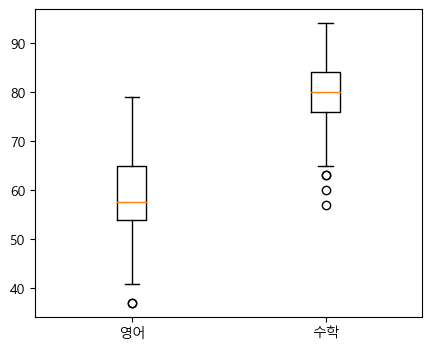

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_name = "C:/Windows/Fonts/malgun.ttf"
font_family = font_manager.FontProperties(fname=font_name).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False

%matplotlib inline

plt.figure(figsize=(5, 4))
plt.subplot(1,1,1)
plt.boxplot(scores)
plt.xticks([1, 2], scores.columns)
plt.show()